In [59]:
# filename: Data Exploration
# author: Marx Wang

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

# import seaborn as sns
# import statsmodels.api as sm
# import scipy

In [60]:
df = pd.read_csv("data/alldata.csv")

In [61]:
df.head()

,subjectkey,aggressive_sumscore,prosocial_child,prosocial_parent,asr_scr_perstr_t,asr_scr_anxdep_t,asr_scr_withdrawn_t,asr_scr_somatic_t,asr_scr_thought_t,asr_scr_attention_t,...,parent_rules_q4,parent_rules_q7,su_risk_p_1,su_risk_p_2_3,su_risk_p_4_5,neighborhood1_2_3_p,neighborhood_crime_y,interview_date,interview_age,sex
0,NDAR_INV003RTV85,-1.613056,2.0,5.0,53.0,50.0,51.0,57.0,54.0,50.0,...,0,0,2.0,0.0,0.0,5.000000,5.0,10/01/2018,131,F
1,NDAR_INV005V6D2C,-2.020651,6.0,5.0,60.0,50.0,51.0,50.0,50.0,50.0,...,0,0,0.0,1.0,3.0,4.333333,5.0,04/22/2018,121,F
2,NDAR_INV007W6H7B,-2.020651,6.0,6.0,48.0,50.0,50.0,51.0,54.0,50.0,...,0,0,4.0,0.0,4.0,4.666667,4.0,02/21/2017,126,M
3,NDAR_INV00BD7VDC,-1.840037,5.0,4.0,46.0,52.0,51.0,50.0,54.0,50.0,...,0,0,0.0,0.0,0.0,5.000000,3.0,06/12/2018,112,M
4,NDAR_INV00CY2MDM,9.133184,6.0,4.0,50.0,51.0,50.0,50.0,50.0,52.0,...,0,0,0.0,0.0,0.0,3.666667,5.0,08/22/2017,130,M


In [62]:
ag = pd.read_csv("data/aggression.csv")
ag.head()

,subjectkey,aggressive_sumscore,conduct,cbcl_scr_syn_rulebreak_t,cbcl_scr_syn_aggressive_t,cbcl_scr_dsm5_conduct_t,zconduct,zrule,zaggression,zconduct_dsm,Unnamed: 10,Unnamed: 11
0,NDAR_INV003RTV85,-1.613056,0,52,50,50,-0.394586,-0.158614,-0.512484,-0.547372,NaN,-1.613056
1,NDAR_INV005V6D2C,-2.020651,0,50,50,50,-0.394586,-0.566209,-0.512484,-0.547372,NaN,NaN
2,NDAR_INV007W6H7B,-2.020651,0,50,50,50,-0.394586,-0.566209,-0.512484,-0.547372,NaN,NaN
3,NDAR_INV00BD7VDC,-1.840037,0,50,51,50,-0.394586,-0.566209,-0.331870,-0.547372,NaN,NaN
4,NDAR_INV00CY2MDM,9.133184,5,57,68,69,2.647005,0.860373,2.738568,2.887238,NaN,NaN


In [78]:
# import data
data = pd.read_csv("data/alldata.csv")

# peek data
# print('initial data frame: ')
# print(data.head())
# print(data.tail())
# print(data.shape)

# drop label 2 and label 3
data = data.drop(['prosocial_child', 'prosocial_parent'], axis=1)
# drop redundant attribute
data = data.drop(['asr_scr_perstr_t', 'asr_scr_somaticpr_t', 'asr_scr_inattention_t', 'crpbi_bothcare', 'kbi_p_c_best_friend', 'kbi_p_c_reg_friend_group', 'macv_p_ss_fs', 'macv_p_ss_fo', 'macv_p_ss_isr'], axis=1)
data = data.drop(['macv_p_ss_fr', 'macv_p_ss_r', 'demo_prnt_age_v2', 'demo_prnt_marital_v2', 'demo_comb_income_v2', 'demo_yrs_1', 'demo_yrs_2', 'parent_rules_q1', 'parent_rules_q4', 'parent_rules_q7'], axis=1)
data = data.drop(['su_risk_p_1', 'su_risk_p_2_3', 'su_risk_p_4_5', 'interview_age', 'interview_date', 'sex'], axis=1)
# drop nan
data = data.dropna()
# ..print(data.isnull().sum())
# drop meaningless value (-1: not acceptable), (3: not sure)
data = data[data.kbi_p_conflict != -1.0]
data = data[data.kbi_p_c_mh_sa != 3.0]
# ..print(data['kbi_p_conflict'].value_counts())
# ..print(data['kbi_p_c_mh_sa'].value_counts())

# data description
data['aggressive_sumscore_original'] = data['aggressive_sumscore']
minimum = min(data['aggressive_sumscore'])
q75 = data['aggressive_sumscore'].quantile(0.75)
q66 = data['aggressive_sumscore'].quantile(0.66)
# print('--------------------------------------------------------')
# print('<describe>\n', data['aggressive_sumscore'].describe())
# print('\n <75 percentile> \n', q75)

# classify labels
data['aggressive_sumscore'] = data['aggressive_sumscore'].replace([minimum], 0)
print(data.shape)
for i in range(len(data.index)):
    old_value = data.iloc[i]['aggressive_sumscore']
    if old_value >= q75:
        data['aggressive_sumscore'] = data['aggressive_sumscore'].replace([old_value], 1)
    elif old_value < q75 and old_value != 0:
        data['aggressive_sumscore'] = data['aggressive_sumscore'].replace([old_value], -1)

data = data[data.aggressive_sumscore != -1]
print(data.shape)

data.drop(['aggressive_sumscore'], axis=1)


# print('------------------------------------------')
# print('value count: ')
# print(data['aggressive_sumscore'].value_counts())

# # peek data
# print('-------------------------------------------')
# print('processed data frame')
# print(data.head())
# print(data.tail())
# print(data.shape)




(11608, 29)
(7437, 29)


,subjectkey,asr_scr_anxdep_t,asr_scr_withdrawn_t,asr_scr_somatic_t,asr_scr_thought_t,asr_scr_attention_t,asr_scr_aggressive_t,asr_scr_rulebreak_t,asr_scr_intrusive_t,asr_scr_internal_t,...,parent_monitor_y,kbi_p_conflict,kbi_p_c_bully,kbi_p_c_mh_sa,fes_youth,fes_p_ss_fc_pr,demo_fam_exp,neighborhood1_2_3_p,neighborhood_crime_y,aggressive_sumscore_original
1,NDAR_INV005V6D2C,50.0,51.0,50.0,50.0,50.0,50.0,50.0,50.0,34.0,...,4.6,1.0,0.0,0.0,0.0,1.0,0,4.333333,5.0,-2.020651
2,NDAR_INV007W6H7B,50.0,50.0,51.0,54.0,50.0,51.0,51.0,52.0,41.0,...,4.4,1.0,1.0,1.0,0.0,5.0,0,4.666667,4.0,-2.020651
4,NDAR_INV00CY2MDM,51.0,50.0,50.0,50.0,52.0,56.0,55.0,50.0,43.0,...,5.0,3.0,0.0,0.0,1.0,8.0,1,3.666667,5.0,9.133184
6,NDAR_INV00J52GPG,52.0,50.0,51.0,50.0,53.0,51.0,51.0,50.0,46.0,...,4.6,1.0,0.0,1.0,0.0,0.0,0,5.000000,5.0,-2.020651
7,NDAR_INV00LH735Y,50.0,50.0,52.0,50.0,50.0,50.0,50.0,56.0,40.0,...,4.8,1.0,0.0,0.0,0.0,3.0,0,4.000000,5.0,-2.020651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11840,NDAR_INVZZJ3A7BK,62.0,67.0,65.0,75.0,65.0,72.0,71.0,56.0,67.0,...,4.6,2.0,1.0,0.0,3.0,6.0,1,2.666667,5.0,4.348620
11842,NDAR_INVZZLZCKAY,67.0,63.0,87.0,63.0,66.0,61.0,50.0,50.0,77.0,...,5.0,1.0,1.0,0.0,2.0,4.0,0,2.666667,5.0,3.400478
11843,NDAR_INVZZNX6W2P,50.0,53.0,50.0,50.0,50.0,51.0,50.0,50.0,43.0,...,5.0,2.0,0.0,0.0,0.0,2.0,0,5.000000,4.0,1.032541
11844,NDAR_INVZZPKBDAC,52.0,50.0,53.0,50.0,50.0,50.0,50.0,50.0,48.0,...,4.4,1.0,0.0,0.0,0.0,2.0,0,4.000000,5.0,-2.020651


accuracy_history:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
best iteration:  0
best iteration:  1
best iteration:  2
best iteration:  3
best iteration:  4
best iteration:  5
best iteration:  6
best iteration:  7
best iteration:  8
best iteration:  9
Confusion Matrix
 [[453   0]
 [  0 290]]
accuracy:  1.0
f1 score:  1.0
recall:  1.0
precision:  1.0
kappa:  1.0
tree depth:  1


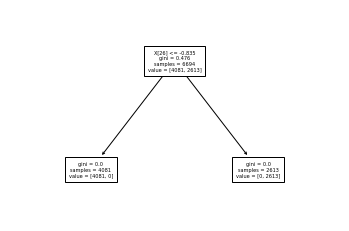

In [64]:
agg_data = data
X = np.array(agg_data[agg_data.columns[2:]])
y = np.array(agg_data['aggressive_sumscore'])
folds = StratifiedKFold(n_splits=10)
clf_history = []
train_test_history = []
for train_index, test_index in folds.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    clf_history.append(clf)
    train_test_history.append((X_train, X_test, y_train, y_test))

scores = cross_val_score(tree.DecisionTreeClassifier(), X, y, cv=10)
print('accuracy_history: ', scores)
min_error = max(scores)
best_clf = clf_history[0]
validation_set = train_test_history[0]    # X_train, X_test, y_train, y_test
for i in range(len(scores)):
    if scores[i] == min_error:
        print('best iteration: ', i)
        best_clf = clf_history[i]
        validation_set = train_test_history[i]

y_pred = best_clf.predict(validation_set[1])

# evaluation
print('Confusion Matrix\n', confusion_matrix(validation_set[3], y_pred))
print('accuracy: ', accuracy_score(validation_set[3], y_pred))
print('f1 score: ', f1_score(validation_set[3], y_pred))
print('recall: ', recall_score(validation_set[3], y_pred))
print('precision: ', precision_score(validation_set[3], y_pred))
print('kappa: ', cohen_kappa_score(validation_set[3], y_pred))

print('tree depth: ', best_clf.tree_.max_depth)

# graph
tree.plot_tree(best_clf, max_depth=3, fontsize=5)
plt.show()
text_representation = tree.export_text(best_clf)

In [65]:
from sklearn.linear_model import LinearRegression
X = np.array(data[data.columns[2:28]])
y = np.array(data['aggressive_sumscore_original'])
reg = LinearRegression().fit(X, y)
print('R2: ', reg.score(X, y))
print('coef: ', reg.coef_)


R2:  0.4963662074994434
coef:  [-3.56896480e-02  3.03821581e-02  3.32706591e-02  6.53837881e-02
  4.11122315e-02  4.35770005e-02 -4.21517160e-04  1.05512461e-02
  1.57147105e-02  3.74664420e-02 -1.17812014e-02 -1.89861465e-02
  4.36971323e-03  5.22582866e-03 -5.65707509e-02 -8.91851552e-04
  4.37861652e-02 -2.40331826e-01  2.93699940e+00  1.45192954e+00
  2.52344070e+00  1.22385851e-01  2.13129270e-01  6.97666011e-01
 -1.56855630e-01 -1.59328062e-01]


In [68]:
from pandas._testing import assert_frame_equal
print(df1.shape())
#assert_frame_equal(data[data.columns[2:28]], df1[df1.columns[2:28]])

AssertionError: DataFrame are different

DataFrame shape mismatch
[left]:  (7437, 26)
[right]: (11608, 26)

In [75]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X,y)
print('R2: ', clf.score(X, y))
print('coef: ', clf.coef_)

R2:  0.3620089514137127
coef:  [-0.00303849  0.0372034   0.03737633  0.04913126 -0.          0.02511495
  0.01654159 -0.          0.          0.02399664  0.         -0.0038208
  0.         -0.         -0.          0.00792491  0.01414583 -0.
  1.88577429  0.57742626  1.35600661  0.12042345  0.18977609  0.03762229
 -0.08081538 -0.10743365]


In [87]:
# import data
df1 = pd.read_csv("data/alldata.csv")

# drop label 2 and label 3
df1 = df1.drop(['prosocial_child', 'prosocial_parent'], axis=1)
# drop redundant attribute


# drop redundant attribute
df1 = df1.drop(['asr_scr_perstr_t', 'asr_scr_somaticpr_t', 'asr_scr_inattention_t', 'crpbi_bothcare', 'kbi_p_c_best_friend', 'kbi_p_c_reg_friend_group', 'macv_p_ss_fs', 'macv_p_ss_fo', 'macv_p_ss_isr'], axis=1)
df1 = df1.drop(['macv_p_ss_fr', 'macv_p_ss_r', 'demo_prnt_age_v2', 'demo_prnt_marital_v2', 'demo_comb_income_v2', 'demo_yrs_1', 'demo_yrs_2', 'parent_rules_q1', 'parent_rules_q4', 'parent_rules_q7', 'demo_fam_exp'], axis=1)
df1 = df1.drop(['su_risk_p_1', 'su_risk_p_2_3', 'su_risk_p_4_5', 'interview_age', 'interview_date', 'sex'], axis=1)

# drop nan
df1 = df1.dropna()

# ..print(data.isnull().sum())
# drop meaningless value (-1: not acceptable), (3: not sure)
df1 = df1[df1.kbi_p_conflict != -1.0]
df1 = df1[df1.kbi_p_c_mh_sa != 3.0]

df1['aggressive_sumscore_original'] = df1['aggressive_sumscore']

print(df1.columns[2:27])

X = np.array(df1[df1.columns[2:27]])
y = np.array(df1['aggressive_sumscore_original'])
reg = LinearRegression().fit(X, y)
print('R2: ', reg.score(X, y))
print('coef: ', reg.coef_)


clf = linear_model.Lasso(alpha=0.1)
clf.fit(X,y)
print('Lasso R2: ', clf.score(X, y))
print('Lasso coef: ', clf.coef_)



Index(['asr_scr_anxdep_t', 'asr_scr_withdrawn_t', 'asr_scr_somatic_t',
       'asr_scr_thought_t', 'asr_scr_attention_t', 'asr_scr_aggressive_t',
       'asr_scr_rulebreak_t', 'asr_scr_intrusive_t', 'asr_scr_internal_t',
       'asr_scr_external_t', 'asr_scr_totprob_t', 'asr_scr_depress_t',
       'asr_scr_anxdisord_t', 'asr_scr_avoidant_t', 'asr_scr_adhd_t',
       'asr_scr_antisocial_t', 'asr_scr_hyperactive_t', 'parent_monitor_y',
       'kbi_p_conflict', 'kbi_p_c_bully', 'kbi_p_c_mh_sa', 'fes_youth',
       'fes_p_ss_fc_pr', 'neighborhood1_2_3_p', 'neighborhood_crime_y'],
      dtype='object')
R2:  0.37828998047324736
coef:  [-2.51485750e-02  4.75012698e-02  3.63229195e-02  5.38444873e-02
  3.33639421e-02  3.08196931e-02  2.21849303e-02 -1.51644009e-03
  1.50483684e-02  2.72111896e-02 -2.56032163e-02 -1.67031588e-02
  1.12757819e-02 -1.38997919e-02 -4.52445317e-02  4.27988057e-03
  4.50838962e-02 -2.09317157e-01  2.33628097e+00  1.23838288e+00
  1.94962293e+00  1.12234160e-01  1.86

In [80]:
df1.max()

subjectkey                      NDAR_INVZZZP87KR
aggressive_sumscore                    33.373756
asr_scr_perstr_t                            60.0
asr_scr_anxdep_t                            98.0
asr_scr_withdrawn_t                         97.0
asr_scr_somatic_t                           98.0
asr_scr_thought_t                           95.0
asr_scr_attention_t                         94.0
asr_scr_aggressive_t                        89.0
asr_scr_rulebreak_t                         80.0
asr_scr_intrusive_t                         76.0
asr_scr_internal_t                          95.0
asr_scr_external_t                          90.0
asr_scr_totprob_t                           89.0
asr_scr_depress_t                          100.0
asr_scr_anxdisord_t                         80.0
asr_scr_somaticpr_t                        100.0
asr_scr_avoidant_t                          90.0
asr_scr_adhd_t                             100.0
asr_scr_antisocial_t                        83.0
asr_scr_inattention_

In [85]:
df1 = pd.read_csv("data/alldata.csv")
print(df1.shape)
# drop redundant attribute
df1 = df1.drop(['asr_scr_perstr_t', 'asr_scr_somaticpr_t', 'asr_scr_inattention_t', 'crpbi_bothcare', 'kbi_p_c_best_friend', 'kbi_p_c_reg_friend_group', 'macv_p_ss_fs', 'macv_p_ss_fo', 'macv_p_ss_isr'], axis=1)
df1 = df1.drop(['macv_p_ss_fr', 'macv_p_ss_r', 'demo_prnt_age_v2', 'demo_prnt_marital_v2', 'demo_comb_income_v2', 'demo_yrs_1', 'demo_yrs_2', 'parent_rules_q1', 'parent_rules_q4', 'parent_rules_q7'], axis=1)
df1 = df1.drop(['su_risk_p_1', 'su_risk_p_2_3', 'su_risk_p_4_5', 'interview_age', 'interview_date', 'sex'], axis=1)
print(df1.shape)


(11848, 55)
(11848, 30)


In [88]:
≈ = pd.read_csv("data/alldata.csv")
df1.columns

Index(['subjectkey', 'aggressive_sumscore', 'prosocial_child',
       'prosocial_parent', 'asr_scr_perstr_t', 'asr_scr_anxdep_t',
       'asr_scr_withdrawn_t', 'asr_scr_somatic_t', 'asr_scr_thought_t',
       'asr_scr_attention_t', 'asr_scr_aggressive_t', 'asr_scr_rulebreak_t',
       'asr_scr_intrusive_t', 'asr_scr_internal_t', 'asr_scr_external_t',
       'asr_scr_totprob_t', 'asr_scr_depress_t', 'asr_scr_anxdisord_t',
       'asr_scr_somaticpr_t', 'asr_scr_avoidant_t', 'asr_scr_adhd_t',
       'asr_scr_antisocial_t', 'asr_scr_inattention_t',
       'asr_scr_hyperactive_t', 'crpbi_bothcare', 'parent_monitor_y',
       'kbi_p_conflict', 'kbi_p_c_best_friend', 'kbi_p_c_reg_friend_group',
       'kbi_p_c_bully', 'kbi_p_c_mh_sa', 'fes_youth', 'fes_p_ss_fc_pr',
       'macv_p_ss_fs', 'macv_p_ss_fo', 'macv_p_ss_isr', 'macv_p_ss_fr',
       'macv_p_ss_r', 'demo_prnt_age_v2', 'demo_prnt_marital_v2',
       'demo_comb_income_v2', 'demo_fam_exp', 'demo_yrs_1', 'demo_yrs_2',
       'parent_rule

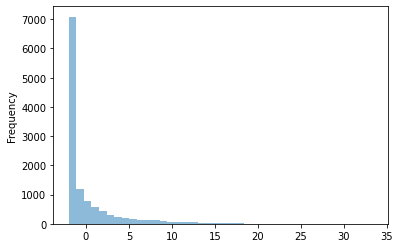

In [92]:
x = df1['aggressive_sumscore'].plot.hist(bins=40, alpha=0.5)

(array([8.286e+03, 1.338e+03, 7.400e+02, 4.400e+02, 3.120e+02, 2.380e+02,
        1.750e+02, 1.060e+02, 9.000e+01, 3.900e+01, 3.400e+01, 1.900e+01,
        1.600e+01, 1.100e+01, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

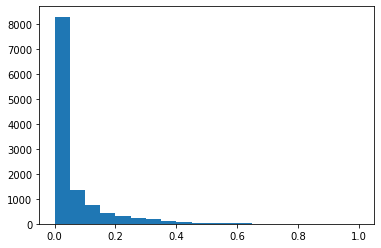

In [98]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(np.array(df1['aggressive_sumscore']).reshape(-1, 1))
import matplotlib.pyplot as plt
plt.hist(d, bins = 20)


(array([8548.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 3300.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

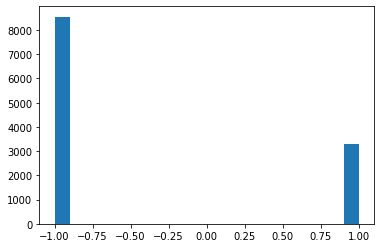

In [99]:
from sklearn import preprocessing
d = preprocessing.normalize(np.array(df1['aggressive_sumscore']).reshape(-1, 1), norm='l2')
#d = scaler.fit_transform(np.array(df1['aggressive_sumscore']).reshape(-1, 1))
import matplotlib.pyplot as plt
plt.hist(d, bins = 20)


In [101]:
df1 = pd.read_csv("data/brain_cb.csv")
print(df1.columns)

Index(['subjectkey', 'aggressive_sumscore', 'prosocial_child',
       'prosocial_parent', 'rsfmri_cor_ngd_cerc_scs_thp',
       'rsfmri_cor_ngd_cerc_scs_cde', 'rsfmri_cor_ngd_cerc_scs_pt',
       'rsfmri_cor_ngd_cerc_scs_hp', 'rsfmri_cor_ngd_cerc_scs_ag',
       'rsfmri_cor_ngd_cerc_scs_aa', 'rsfmri_cor_ngd_cerc_scs_bs',
       'rsfmri_cor_ngd_df_scs_thp', 'rsfmri_cor_ngd_df_scs_cde',
       'rsfmri_cor_ngd_df_scs_pt', 'rsfmri_cor_ngd_df_scs_hp',
       'rsfmri_cor_ngd_df_scs_ag', 'rsfmri_cor_ngd_df_scs_aa',
       'rsfmri_cor_ngd_df_scs_bs', 'rsfmri_cor_ngd_dsa_scs_thp',
       'rsfmri_cor_ngd_dsa_scs_cde', 'rsfmri_cor_ngd_dsa_scs_pt',
       'rsfmri_cor_ngd_dsa_scs_hp', 'rsfmri_cor_ngd_dsa_scs_ag',
       'rsfmri_cor_ngd_dsa_scs_aa', 'rsfmri_cor_ngd_dsa_scs_bs',
       'rsfmri_cor_ngd_fopa_scs_thp', 'rsfmri_cor_ngd_fopa_scs_cde',
       'rsfmri_cor_ngd_fopa_scs_pt', 'rsfmri_cor_ngd_fopa_scs_hp',
       'rsfmri_cor_ngd_fopa_scs_ag', 'rsfmri_cor_ngd_fopa_scs_aa',
       'rsfmri_cor_ngd